In [1]:
%pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 13.6 MB/s eta 0:00:00


In [2]:
import mne
import numpy
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import matplotlib.pyplot as plt


# psds, freqs = mne.time_frequency.psd_welch(raw, picks=picks, fmin=2, fmax=40, tmin=0, tmax=raw.times[-1], n_fft=2048)
# psds = 10 * np.log10(psds)
x_rest=raw_rest.compute_psd(fmax=100).plot(picks='data', exclude="bads", amplitude=False)
x_stress=raw_stress.compute_psd(fmax=100).plot(picks='data', exclude="bads", amplitude=False)
plt.show()

NameError: name 'raw_rest' is not defined

In [7]:
# edf_file_rest='/Users/shivanshmundra/Downloads/eeg-during-mental-arithmetic-tasks-1.0.0/edf files/Subject00_1.edf'
# edf_file_stress='/Users/shivanshmundra/Downloads/eeg-during-mental-arithmetic-tasks-1.0.0/edf files/Subject00_2.edf'
# raw_rest = mne.io.read_raw_edf(edf_file_rest, preload=True)
# raw_stress = mne.io.read_raw_edf(edf_file_stress, preload=True)

In [ ]:
x_rest_data=raw_rest.compute_psd(fmax=100)
x_rest_data.get_data().shape

Effective window size : 4.096 (s)


(21, 410)

Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


/Users/shivanshmundra/anaconda3/envs/ai/lib/python3.10/site-packages/mne/viz/utils.py:167: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


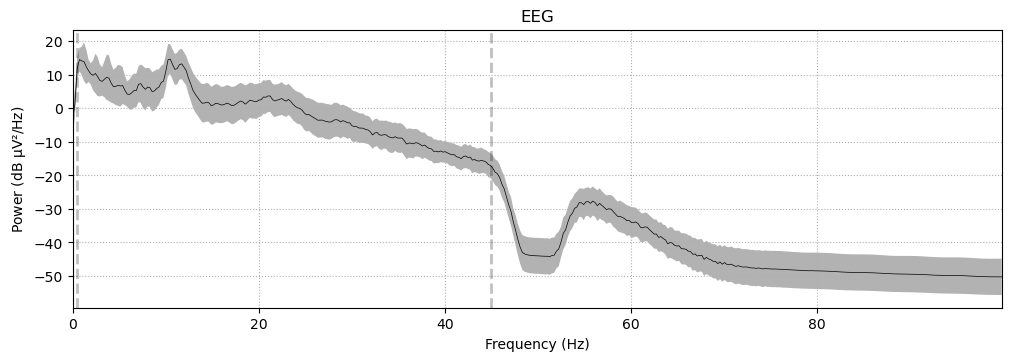

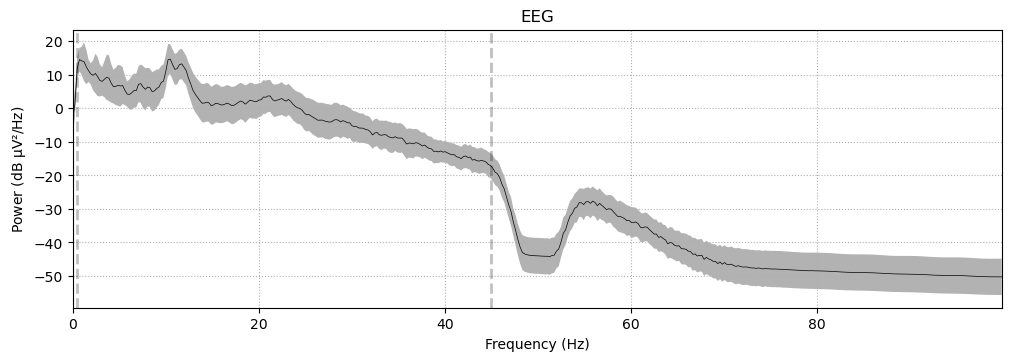

In [ ]:
fig = raw_rest.compute_psd(tmax=np.inf, fmax=100).plot(
    average=True, amplitude=False, picks="data", exclude="bads"
)
# add some arrows at 60 Hz and its harmonics:
for ax in fig.axes[1:]:
    freqs = ax.lines[-1].get_xdata()
    psds = ax.lines[-1].get_ydata()
    for freq in (60, 120, 180, 240):
        idx = np.searchsorted(freqs, freq)
        ax.arrow(
            x=freqs[idx],
            y=psds[idx] + 18,
            dx=0,
            dy=-12,
            color="red",
            width=0.1,
            head_width=3,
            length_includes_head=True,
        )

plt.show()

In [ ]:

epochs = mne.make_fixed_length_epochs(raw_rest, duration=3, overlap=1, preload=False)

Not setting metadata
90 matching events found
No baseline correction applied
0 projection items activated


In [ ]:
epochs.get_data().shape

Using data from preloaded Raw for 90 events and 1500 original time points ...


(90, 21, 1500)

In [ ]:
x_rest_epoch=epochs.compute_psd(fmin=1,fmax=4,method="welch",picks='data')

Using data from preloaded Raw for 90 events and 1500 original time points ...
Effective window size : 3.000 (s)


In [ ]:
x_rest_epoch.get_data().shape

(90, 21, 10)

In [5]:
all_edf_file_path='/content/drive/MyDrive/eeg-during-mental-arithmetic-tasks-1.0.0/edf files'

In [6]:
import os
rest_files = []
stress_files = []

# Iterate through the folder to collect file paths
for file_name in os.listdir(all_edf_file_path):
    if file_name.endswith('_1.edf'):
        rest_files.append(os.path.join(all_edf_file_path, file_name))
    elif file_name.endswith('_2.edf'):
        stress_files.append(os.path.join(all_edf_file_path, file_name))

In [7]:
print(f"\nNumber of rest files: {len(rest_files)}")
print(f"Number of stress files: {len(stress_files)}")


Number of rest files: 36
Number of stress files: 36


In [8]:
def read_raw_data(file_path):
    raw_data=mne.io.read_raw_edf(file_path, preload=True)
    raw_array=raw_data.get_data()
    return raw_array

In [9]:
all_rest_raw_array=[read_raw_data(i) for i in rest_files]
all_stress_raw_array=[read_raw_data(i) for i in stress_files]

Extracting EDF parameters from /content/drive/MyDrive/eeg-during-mental-arithmetic-tasks-1.0.0/edf files/Subject10_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 93999  =      0.000 ...   187.998 secs...
Extracting EDF parameters from /content/drive/MyDrive/eeg-during-mental-arithmetic-tasks-1.0.0/edf files/Subject12_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from /content/drive/MyDrive/eeg-during-mental-arithmetic-tasks-1.0.0/edf files/Subject11_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from /content/drive/MyDrive/eeg-during-mental-arithmetic-tasks-1.0.0/edf files/Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Read

In [10]:
all_rest_raw_array[0].shape

(21, 94000)

In [11]:
def read_data(file_path):
    raw_data=mne.io.read_raw_edf(file_path, preload=True)
    epochs = mne.make_fixed_length_epochs(raw_data, duration=2, overlap=1, preload=False)
    epoch_array=epochs.get_data()
    return epoch_array


In [12]:
all_rest_edf_array=[read_data(i) for i in rest_files]
all_stress_edf_array=[read_data(i) for i in stress_files]

Extracting EDF parameters from /content/drive/MyDrive/eeg-during-mental-arithmetic-tasks-1.0.0/edf files/Subject10_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 93999  =      0.000 ...   187.998 secs...
Not setting metadata
187 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 187 events and 1000 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/eeg-during-mental-arithmetic-tasks-1.0.0/edf files/Subject12_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Not setting metadata
181 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 181 events and 1000 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/eeg-du

In [13]:
all_rest_edf_array[0].shape

(187, 21, 1000)

In [14]:
def read_psd_array(file_path , bands):
    raw_data=mne.io.read_raw_edf(file_path, preload=True)
    epochs = mne.make_fixed_length_epochs(raw_data, duration=2, overlap=1, preload=False)
    for fmin, fmax in bands:
        psd = epochs.compute_psd(fmin=fmin, fmax=fmax, method='welch')
        psd_array=psd.get_data()
    return psd_array

In [15]:
bands = [(1, 4), (4, 8), (8, 12), (12, 30), (30, 100)]  # Delta, Theta, Alpha, Beta, Gamma

all_rest_psd_array=[read_psd_array(i,bands) for i in rest_files]
all_stress_psd_array=[read_psd_array(i,bands) for i in stress_files]

Extracting EDF parameters from /content/drive/MyDrive/eeg-during-mental-arithmetic-tasks-1.0.0/edf files/Subject10_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 93999  =      0.000 ...   187.998 secs...
Not setting metadata
187 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 187 events and 1000 original time points ...
0 bad epochs dropped
Effective window size : 2.000 (s)
Using data from preloaded Raw for 187 events and 1000 original time points ...
Effective window size : 2.000 (s)
Using data from preloaded Raw for 187 events and 1000 original time points ...
Effective window size : 2.000 (s)
Using data from preloaded Raw for 187 events and 1000 original time points ...
Effective window size : 2.000 (s)
Using data from preloaded Raw for 187 events and 1000 original time points ...
Effective window size : 2.000 (s)
Extracting EDF parameters from /content/driv

In [16]:
rest_labels=[len(i)*[0] for i in all_rest_psd_array]
stress_labels=[len(i)*[1] for i in all_stress_psd_array]
print(len(rest_labels),len(stress_labels))

36 36


In [17]:
rest_edf_labels=[len(i)*[0] for i in all_rest_edf_array]
stress_edf_labels=[len(i)*[1] for i in all_stress_edf_array]

print(len(rest_edf_labels),len(stress_edf_labels))

36 36


In [18]:
labeled_edf_data=rest_edf_labels + stress_edf_labels
all_epoch_data=all_rest_edf_array+all_stress_edf_array
all_psd_data=all_rest_psd_array + all_stress_psd_array
labeled_data=rest_labels + stress_labels

In [19]:
import keras
from sklearn.model_selection import train_test_split
keras.backend.set_image_data_format('channels_first')

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Permute, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import SeparableConv2D, DepthwiseConv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import SpatialDropout2D
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import backend as K


def EEGNet(nb_classes, Chans, Samples,
             dropoutRate, kernLength = 70, F1 = 4,
             D = 2, F2 = 8, norm_rate = 0.25, dropoutType = 'Dropout'):
    """ Keras Implementation of EEGNet
    http://iopscience.iop.org/article/10.1088/1741-2552/aace8c/meta

    Note that this implements the newest version of EEGNet and NOT the earlier
    version (version v1 and v2 on arxiv). We strongly recommend using this
    architecture as it performs much better and has nicer properties than
    our earlier version. For example:

        1. Depthwise Convolutions to learn spatial filters within a
        temporal convolution. The use of the depth_multiplier option maps
        exactly to the number of spatial filters learned within a temporal
        filter. This matches the setup of algorithms like FBCSP which learn
        spatial filters within each filter in a filter-bank. This also limits
        the number of free parameters to fit when compared to a fully-connected
        convolution.

        2. Separable Convolutions to learn how to optimally combine spatial
        filters across temporal bands. Separable Convolutions are Depthwise
        Convolutions followed by (1x1) Pointwise Convolutions.


    While the original paper used Dropout, we found that SpatialDropout2D
    sometimes produced slightly better results for classification of ERP
    signals. However, SpatialDropout2D significantly reduced performance
    on the Oscillatory dataset (SMR, BCI-IV Dataset 2A). We recommend using
    the default Dropout in most cases.

    Assumes the input signal is sampled at 128Hz. If you want to use this model
    for any other sampling rate you will need to modify the lengths of temporal
    kernels and average pooling size in blocks 1 and 2 as needed (double the
    kernel lengths for double the sampling rate, etc). Note that we haven't
    tested the model performance with this rule so this may not work well.

    The model with default parameters gives the EEGNet-4,2 model as discussed
    in the paper. This model should do pretty well in general, although as the
    paper discussed the EEGNet-8,2 (with 8 temporal kernels and 2 spatial
    filters per temporal kernel) can do slightly better on the SMR dataset.
    Other variations that we found to work well are EEGNet-4,1 and EEGNet-8,1.

    We set F2 = F1 * D (number of input filters = number of output filters) for
    the SeparableConv2D layer. We haven't extensively tested other values of this
    parameter (say, F2 < F1 * D for compressed learning, and F2 > F1 * D for
    overcomplete). We believe the main parameters to focus on are F1 and D.

    Inputs:

      nb_classes      : int, number of classes to classify
      Chans, Samples  : number of channels and time points in the EEG data
      dropoutRate     : dropout fraction
      kernLength      : length of temporal convolution in first layer. We found
                        that setting this to be half the sampling rate worked
                        well in practice. For the SMR dataset in particular
                        since the data was high-passed at 4Hz we used a kernel
                        length of 32.
      F1, F2          : number of temporal filters (F1) and number of pointwise
                        filters (F2) to learn. Default: F1 = 4, F2 = F1 * D.
      D               : number of spatial filters to learn within each temporal
                        convolution. Default: D = 2
      dropoutType     : Either SpatialDropout2D or Dropout, passed as a string.

    """

    if dropoutType == 'SpatialDropout2D':
        dropoutType = SpatialDropout2D
    elif dropoutType == 'Dropout':
        dropoutType = Dropout
    else:
        raise ValueError('dropoutType must be one of SpatialDropout2D '
                         'or Dropout, passed as a string.')

    input1   = Input(shape = (1, Chans, Samples))

    ##################################################################
    block1       = Conv2D(F1, (1, kernLength), padding = 'same',
                                   input_shape = (1, Chans, Samples),
                                   use_bias = False)(input1)
    block1       = BatchNormalization(axis = 1)(block1)
    block1       = DepthwiseConv2D((Chans, 1), use_bias = False,
                                   depth_multiplier = D,
                                   depthwise_constraint = max_norm(1.))(block1)
    block1       = BatchNormalization(axis = 1)(block1)
    block1       = Activation('elu')(block1)
    block1       = AveragePooling2D((1, 4))(block1)
    block1       = dropoutType(dropoutRate)(block1)

    block2       = SeparableConv2D(F2, (1, 16),
                                   use_bias = False, padding = 'same')(block1)
    block2       = BatchNormalization(axis = 1)(block2)
    block2       = Activation('elu')(block2)
    block2       = AveragePooling2D((1, 8))(block2)
    block2       = dropoutType(dropoutRate)(block2)

    flatten      = Flatten(name = 'flatten')(block2)

    dense        = Dense(nb_classes, name = 'dense',
                         kernel_constraint = max_norm(norm_rate))(flatten)
    softmax      = Activation('sigmoid', name = 'softmax')(dense)

    return Model(inputs=input1, outputs=softmax)


In [20]:
import numpy as np
psd_data_arr=np.vstack(all_psd_data)
epoch_array=np.vstack(all_epoch_data)
label_arr=np.hstack(labeled_data)
# group_arr=np.hstack(group_list)
label_edf_arr=np.hstack(labeled_edf_data)
print(psd_data_arr.shape,epoch_array.shape,label_arr.shape,label_edf_arr.shape)


(8604, 21, 141) (8604, 21, 1000) (8604,) (8604,)


In [21]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

scaler = MinMaxScaler()
n_samples, n_channels, n_times = psd_data_arr.shape
psd_data_arr = psd_data_arr.reshape(n_channels, -1)
psd_data_arr = scaler.fit_transform(psd_data_arr)
psd_data_arr = psd_data_arr.reshape(n_samples, n_channels, n_times)

assert len(np.unique(label_arr)) == 2, "Labels should be binary for binary classification."

psd_data_arr = psd_data_arr[:, np.newaxis, :, :]  # Shape: (8604, 1, 21, 141)
X_train, X_test, y_train, y_test = train_test_split(psd_data_arr, label_arr, test_size=0.2, random_state=42)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [22]:
X_train.shape, y_train.shape

((6883, 1, 21, 141), (6883, 2))

In [23]:
model = EEGNet(nb_classes=2, Chans=21, Samples=141, dropoutRate=0.5)  # nb_classes is 1 for binary classification
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [24]:
import tensorflow as tf

In [25]:
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()


In [26]:
history = model.fit(X_train, y_train, epochs=40, batch_size=40, validation_data=(X_test, y_test), verbose=2)


Epoch 1/40
173/173 - 23s - loss: 0.6039 - accuracy: 0.7389 - val_loss: 0.6041 - val_accuracy: 0.7333 - 23s/epoch - 135ms/step
Epoch 2/40
173/173 - 16s - loss: 0.5433 - accuracy: 0.7507 - val_loss: 0.5436 - val_accuracy: 0.7408 - 16s/epoch - 93ms/step
Epoch 3/40
173/173 - 16s - loss: 0.5238 - accuracy: 0.7543 - val_loss: 0.5187 - val_accuracy: 0.7507 - 16s/epoch - 94ms/step
Epoch 4/40
173/173 - 17s - loss: 0.5146 - accuracy: 0.7614 - val_loss: 0.5092 - val_accuracy: 0.7600 - 17s/epoch - 96ms/step
Epoch 5/40
173/173 - 16s - loss: 0.5054 - accuracy: 0.7651 - val_loss: 0.4985 - val_accuracy: 0.7577 - 16s/epoch - 92ms/step
Epoch 6/40
173/173 - 16s - loss: 0.4969 - accuracy: 0.7707 - val_loss: 0.4869 - val_accuracy: 0.7693 - 16s/epoch - 92ms/step
Epoch 7/40
173/173 - 16s - loss: 0.4878 - accuracy: 0.7738 - val_loss: 0.4810 - val_accuracy: 0.7780 - 16s/epoch - 92ms/step
Epoch 8/40
173/173 - 16s - loss: 0.4847 - accuracy: 0.7787 - val_loss: 0.4711 - val_accuracy: 0.7868 - 16s/epoch - 94ms/step

In [27]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

54/54 [==============================] - 1s 19ms/step


In [28]:
from sklearn.metrics import accuracy_score, classification_report

print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.8221963974433469
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1262
           1       0.83      0.42      0.56       459

   micro avg       0.82      0.82      0.82      1721
   macro avg       0.82      0.69      0.72      1721
weighted avg       0.82      0.82      0.80      1721
 samples avg       0.82      0.82      0.82      1721



In [29]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

scaler = MinMaxScaler()
n_samples, n_channels, n_times = epoch_array.shape
epoch_array = epoch_array.reshape(n_samples, -1)
epoch_array = scaler.fit_transform(epoch_array)
epoch_array = epoch_array.reshape(n_samples, n_channels, n_times)

assert len(np.unique(label_edf_arr)) == 2, "Labels should be binary for binary classification."

epoch_array = epoch_array[:, np.newaxis, :, :]  #
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(epoch_array, label_edf_arr, test_size=0.2, random_state=42)

y_train_1 = to_categorical(y_train_1)
y_test_1 = to_categorical(y_test_1)



In [30]:
model = EEGNet(nb_classes=2, Chans=21, Samples=1000, dropoutRate=0.5)  # nb_classes is 2 for binary classification
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_1, y_train_1, epochs=35, batch_size=16, validation_data=(X_test_1, y_test_1), verbose=2)


Epoch 1/35
431/431 - 106s - loss: 0.5733 - accuracy: 0.7443 - val_loss: 0.5915 - val_accuracy: 0.7333 - 106s/epoch - 246ms/step
Epoch 2/35
431/431 - 104s - loss: 0.5596 - accuracy: 0.7476 - val_loss: 0.7068 - val_accuracy: 0.7333 - 104s/epoch - 241ms/step
Epoch 3/35
431/431 - 104s - loss: 0.5483 - accuracy: 0.7475 - val_loss: 0.5542 - val_accuracy: 0.7333 - 104s/epoch - 242ms/step
Epoch 4/35
431/431 - 118s - loss: 0.5408 - accuracy: 0.7478 - val_loss: 0.7207 - val_accuracy: 0.7333 - 118s/epoch - 274ms/step
Epoch 5/35
431/431 - 105s - loss: 0.5247 - accuracy: 0.7510 - val_loss: 0.5648 - val_accuracy: 0.7304 - 105s/epoch - 244ms/step
Epoch 6/35
431/431 - 105s - loss: 0.5183 - accuracy: 0.7580 - val_loss: 0.5531 - val_accuracy: 0.7321 - 105s/epoch - 243ms/step
Epoch 7/35
431/431 - 104s - loss: 0.5146 - accuracy: 0.7548 - val_loss: 0.6681 - val_accuracy: 0.7350 - 104s/epoch - 241ms/step
Epoch 8/35
431/431 - 104s - loss: 0.5038 - accuracy: 0.7591 - val_loss: 1.2554 - val_accuracy: 0.3085 - 

In [31]:
y_pred_1 = model.predict(X_test_1)
y_pred_1 = (y_pred_1 > 0.5).astype(int)

54/54 [==============================] - 3s 58ms/step


In [32]:
from sklearn.metrics import accuracy_score, classification_report

print(f"Test Accuracy: {accuracy_score(y_test_1, y_pred_1)}")
print(classification_report(y_test_1, y_pred_1))

Test Accuracy: 0.7780360255665311
              precision    recall  f1-score   support

           0       0.78      0.98      0.87      1262
           1       0.81      0.22      0.35       459

   micro avg       0.78      0.78      0.78      1721
   macro avg       0.79      0.60      0.61      1721
weighted avg       0.78      0.78      0.73      1721
 samples avg       0.78      0.78      0.78      1721

